# Deepface

In [ ]:
%pip install deepface

In [ ]:
from deepface import DeepFace as deepf

### Visualize Data

In [19]:
import os

def get_image_paths(folder_path):
    image_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')):
                image_paths.append(os.path.join(root, file).replace(os.path.sep, '/'))
    return image_paths

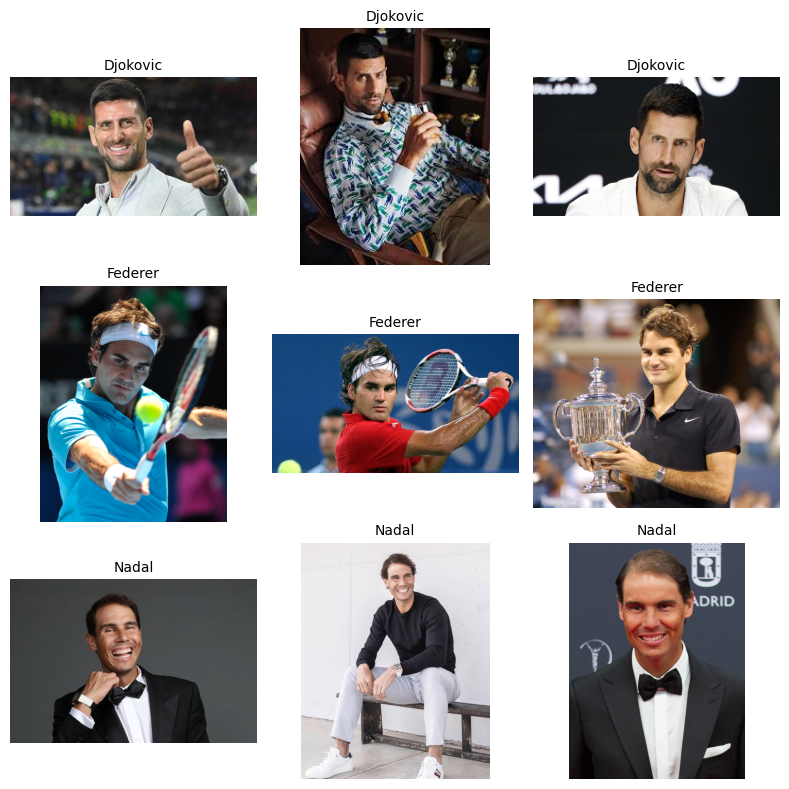

In [23]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import os

def load_images(image_paths):
    """
    Load images from file paths and return them as a list of NumPy arrays.
    """
    images = []
    for path in image_paths:
        img = cv2.imread(path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        images.append(img)
    return images

def display_images_grid(image_paths, labels):
    images = load_images(image_paths)  
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(labels[i], fontsize=10)
        ax.axis("off")  
    
    plt.tight_layout()
    plt.show()

# Example usage:
images = get_image_paths("../data/faces")  
labels = ["Djokovic"] * 3 + ["Federer"] * 3 + ["Nadal"] * 3

display_images_grid(images, labels)


### Testing the Verify Function

In [44]:
djo = deepf.verify(
  img1_path = "../data/faces/djoko/N_djokovic2.jpg",
  img2_path = "../data/faces/djoko/N_djokovic3.jpg",
)
assert djo['verified'] == True, f"Should be true, distance: {djo['distance']}"
print(f"Djo true: distance {djo['distance']}")

fed = deepf.verify(
  img1_path = "../data/faces/fed/R_federer2.jpg",
  img2_path = "../data/faces/fed/R_federer3.jpg",
)
assert fed['verified'] == True, f"Should be true, distance: {fed['distance']}"
print(f"Fed true: distance {fed['distance']}")

nad = deepf.verify(
  img1_path = "../data/faces/nad/R_nadal2.jpg",
  img2_path = "../data/faces/nad/R_nadal3.jpg",
)
assert nad['verified'] == True, f"Should be true, distance: {nad['distance']}"
print(f"Nad true: distance {nad['distance']}")


Djo true: distance 0.33862322993424376
Fed true: distance 0.5439687954373872
Nad true: distance 0.5085464355486848


### Testing the Find Function

In [45]:
dfs = deepf.find(
  img_path = "../data/faces/djoko/N_djokovic2.jpg",
  db_path = "../data/faces/djoko",
)
print(dfs)

25-01-29 23:05:59 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:11<00:00,  3.81s/it]


25-01-29 23:06:11 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-01-29 23:06:11 - Searching ../data/faces/djoko/N_djokovic2.jpg in 3 length datastore
25-01-29 23:06:19 - find function duration 19.218223094940186 seconds
[                              identity  \
0  ../data/faces/djoko\N_djokovic2.jpg   
1  ../data/faces/djoko\N_djokovic3.jpg   
2   ../data/faces/djoko\N_djokovic.jpg   

                                       hash  target_x  target_y  target_w  \
0  c2d24851131a790972fe764cd28c365ba540d574      1316       491       913   
1  c99048df422850507367d924c11da664aded0c8f       396       117       321   
2  32a17e02371fd8f1d98ecec4fc2b9f08c8733f55        47        30        56   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       913      1316       491       913       913       0.68  0.000000  
1       321      1316       491       913       913       0.68  0.338623  
2        5

In [ ]:
deepf.stream("../data/faces/djoko")

25-01-29 23:13:35 - Age model is just built
25-01-29 23:13:35 - Gender model is just built
25-01-29 23:13:35 - Emotion model is just built
25-01-29 23:13:35 - VGG-Face is built
25-01-29 23:13:43 - freezed
25-01-29 23:13:48 - freeze released
25-01-29 23:13:52 - freezed
25-01-29 23:13:57 - freeze released
25-01-29 23:14:01 - freezed
25-01-29 23:14:08 - freeze released
25-01-29 23:14:11 - freezed
25-01-29 23:14:16 - freeze released
25-01-29 23:14:19 - freezed
25-01-29 23:14:24 - freeze released
25-01-29 23:14:28 - freezed
25-01-29 23:14:33 - freeze released
25-01-29 23:14:37 - freezed
25-01-29 23:14:42 - freeze released
25-01-29 23:14:47 - freezed
25-01-29 23:14:52 - freeze released
25-01-29 23:14:56 - freezed
25-01-29 23:15:01 - freeze released
25-01-29 23:15:04 - freezed
25-01-29 23:15:09 - freeze released
25-01-29 23:15:14 - freezed
25-01-29 23:15:19 - freeze released
